<a href="https://colab.research.google.com/github/soohyunme/TensorFlow_Tutorial/blob/main/Code/11_Tensorflow_Datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import matplotlib.pyplot as plt

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow_datasets as tfds

# Device setting

In [2]:
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0],True)

# Image loading with TFDS

In [3]:
(ds_train, ds_test), ds_info = tfds.load(
    'mnist',
    split=['train','test'], # if data have validation ['train','valid','test'],
    shuffle_files=True,
    as_supervised=True, # (img, label)
    with_info=True,
)


## Dataset Info check

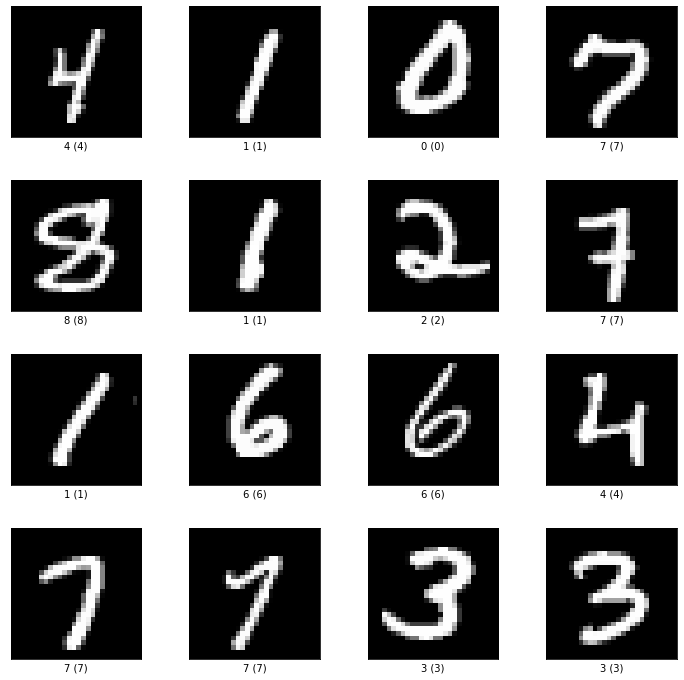

In [4]:
fig = tfds.show_examples(ds_train, ds_info, rows=4, cols=4)

In [5]:
print(ds_info)

tfds.core.DatasetInfo(
    name='mnist',
    version=3.0.1,
    description='The MNIST database of handwritten digits.',
    homepage='http://yann.lecun.com/exdb/mnist/',
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=70000,
    splits={
        'test': 10000,
        'train': 60000,
    },
    supervised_keys=('image', 'label'),
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
    redistribution_info=,
)



# Define Funtion

In [6]:
def normalize_img(image, label):
  # normalize images
  return tf.cast(image, tf.float32)/255.0, label

In [7]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
BATCH_SIZE = 64

In [8]:
ds_train = ds_train.map(normalize_img, num_parallel_calls=AUTOTUNE)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)
ds_train = ds_train.batch(BATCH_SIZE)
ds_train = ds_train.prefetch(AUTOTUNE)

In [9]:
ds_test = ds_test.map(normalize_img, num_parallel_calls=AUTOTUNE)
ds_test = ds_test.batch(128)
ds_test = ds_test.prefetch(AUTOTUNE)

In [10]:
model = keras.Sequential([
    keras.Input((28, 28, 1)),
    layers.Conv2D(32, 3, activation='relu'),
    layers.Flatten(),
    layers.Dense(10),
])
model.compile(
    optimizer = keras.optimizers.Adam(lr=0.001),
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['accuracy'],
)
model.fit(ds_train, epochs=5, verbose=2)
model.evaluate(ds_test)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/5
938/938 - 15s - loss: 0.2091 - accuracy: 0.9416 - 15s/epoch - 16ms/step
Epoch 2/5
938/938 - 4s - loss: 0.0746 - accuracy: 0.9790 - 4s/epoch - 4ms/step
Epoch 3/5
938/938 - 4s - loss: 0.0538 - accuracy: 0.9839 - 4s/epoch - 4ms/step
Epoch 4/5
938/938 - 4s - loss: 0.0421 - accuracy: 0.9875 - 4s/epoch - 4ms/step
Epoch 5/5
938/938 - 4s - loss: 0.0339 - accuracy: 0.9898 - 4s/epoch - 4ms/step
79/79 [==============================] - 2s 27ms/step - loss: 0.0617 - accuracy: 0.9794


[0.06170305237174034, 0.9793999791145325]

# Text loading with TFDS

In [11]:
(ds_train, ds_test), ds_info = tfds.load(
    'imdb_reviews',
    split=['train','test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

In [12]:
print(ds_info)

tfds.core.DatasetInfo(
    name='imdb_reviews',
    version=1.0.0,
    description='Large Movie Review Dataset.
This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. We provide a set of 25,000 highly polar movie reviews for training, and 25,000 for testing. There is additional unlabeled data for use as well.',
    homepage='http://ai.stanford.edu/~amaas/data/sentiment/',
    features=FeaturesDict({
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
        'text': Text(shape=(), dtype=tf.string),
    }),
    total_num_examples=100000,
    splits={
        'test': 25000,
        'train': 25000,
        'unsupervised': 50000,
    },
    supervised_keys=('text', 'label'),
    citation="""@InProceedings{maas-EtAl:2011:ACL-HLT2011,
      author    = {Maas, Andrew L.  and  Daly, Raymond E.  and  Pham, Peter T.  and  Huang, Dan  and  Ng, Andrew Y.  and  Potts, Christopher},
      title     = {Learning Word

In [13]:
for text, label in ds_train:
  print(text)
  break

tf.Tensor(b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.", shape=(), dtype=string)


In [14]:
tokenizer = tfds.deprecated.text.Tokenizer()

In [15]:
def bulid_vocabulary():
  vocabulary = set()
  for text, _ in ds_train:
    vocabulary.update(tokenizer.tokenize(text.numpy().lower()))
  return vocabulary

In [ ]:
vocabulary = bulid_vocabulary()

encoder = tfds.deprecated.text.Tokenizer(
    vocabulary, oov_token='<UNK>', lowercase=True, tokenizer = tokenizer
)

In [ ]:
def my_encoding(text_tensor, label):
  return encoder.encode(text_tensor.numpy()), label

def encode_map(text, label):
  encoded_text, label = tf.py_function(
      my_encoding, inp=[text, label], Tout=(tf.int64, tf.int64)
  )
  encoded_text.set_shape([None])
  label.set_shape([])

  return encoded_text, label

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
ds_train = ds_train.map(encode_map, num_parallel_calls=AUTOTUNE).cache()
ds_train = ds_train.shuffle(10000)
ds_train = ds_train.padded_batch(32, padded_shapes=)([None],()))
ds_train = ds_train.prefetch(AUTOTUNE)

ds_test = ds_test.map(encode_map)
ds_test = ds_test.padded_batch(32, padded_shapes=([None],()))

In [ ]:
model = keras.Sequential([
    layers.Masking(mask_value=0),
    layers.Embedding(input_dim=len(vocabulary)+2, output_dim=32),
    # BATCH_SIZE x 1000 -> BATCH_SIZE x 1000 x 32
    layers.GlobalAveragePooling1D(),
    # BATCH_SIZE x 32
    layers.Dense(64, activation='relu'),
    layers.Dense(1), # less than 0 negative, greater or equal than 0 positive
])

model.compile([
               loss = keras.losses.BinaryCrossentropy(from_logits=True),
               optimizer = keras.optimizers.Adam(3e-4, clipnorm=1),
               metrics=['accuracy']
])

model.fit(ds_train, epochs=10, verbose=2)
model.evaluate(ds_test)